# 서울 날씨 트위터를 위한 머신러닝

![서울타워](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/QRCode.png.png)

* Data set: pm25.csv

* Date: 23rd Apr 2019

* Coded By Haesung Lee

* AWS-IoT Diagram:

![Image](https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/AWS-IoT_Analytics.png)


In [1]:
# PM2.5 먼지데이터

{sensor:22.638533,prediction:22.000000}
{sensor:22.640344,prediction:22.000000}
{sensor:22.393283,prediction:22.000000}
{sensor:22.834681,prediction:22.000000}
{sensor:21.615806,prediction:22.000000}
{sensor:21.764126,prediction:22.000000}
{sensor:22.136458,prediction:22.000000}
{sensor:22.141854,prediction:22.000000}
{sensor:22.410807,prediction:23.000000}
{sensor:23.107451,prediction:23.000000}
{sensor:23.165239,prediction:23.000000}
{sensor:23.310661,prediction:23.000000}
{sensor:23.463495,prediction:23.000000}
{sensor:23.383052,prediction:23.000000}
{sensor:23.283348,prediction:23.000000}
{sensor:22.937909,prediction:23.000000}
{sensor:23.126953,prediction:23.000000}
{sensor:23.079268,prediction:22.000000}
{sensor:21.644120,prediction:22.000000}
{sensor:21.853971,prediction:22.000000}
{sensor:22.001940,prediction:22.000000}
{sensor:21.793584,prediction:21.000000}
{sensor:21.175506,prediction:21.000000}
{sensor:21.092934,prediction:22.000000}
{sensor:22.157974,prediction:22.000000}


{sensor:19.930766,prediction:19.000000}
{sensor:19.387178,prediction:19.000000}
{sensor:19.252194,prediction:19.000000}
{sensor:19.388178,prediction:17.000000}
{sensor:16.220797,prediction:17.000000}
{sensor:16.364646,prediction:17.000000}
{sensor:16.968898,prediction:17.000000}
{sensor:16.458545,prediction:17.000000}
{sensor:17.394001,prediction:19.000000}
{sensor:19.637633,prediction:18.000000}
{sensor:18.429569,prediction:18.000000}
{sensor:18.209716,prediction:18.000000}
{sensor:18.654364,prediction:18.000000}
{sensor:18.237653,prediction:18.000000}
{sensor:18.268323,prediction:18.000000}
{sensor:18.049047,prediction:18.000000}
{sensor:18.166156,prediction:18.000000}
{sensor:17.806286,prediction:20.000000}
{sensor:19.862404,prediction:20.000000}
{sensor:20.870567,prediction:20.000000}
{sensor:20.521803,prediction:20.000000}
{sensor:20.914937,prediction:20.000000}
{sensor:20.444149,prediction:20.000000}
{sensor:19.971467,prediction:20.000000}
{sensor:19.799004,prediction:20.000000}


{sensor:17.203309,prediction:17.000000}
{sensor:17.221554,prediction:17.000000}
{sensor:16.747456,prediction:17.000000}
{sensor:17.234631,prediction:17.000000}
{sensor:17.260766,prediction:17.000000}
{sensor:17.170341,prediction:17.000000}
{sensor:17.515032,prediction:17.000000}
{sensor:17.211970,prediction:17.000000}
{sensor:16.899711,prediction:17.000000}
{sensor:17.236077,prediction:17.000000}
{sensor:17.084747,prediction:17.000000}
{sensor:17.111826,prediction:17.000000}
{sensor:17.236346,prediction:17.000000}
{sensor:17.140715,prediction:17.000000}
{sensor:17.158884,prediction:16.000000}
{sensor:15.957549,prediction:16.000000}
{sensor:15.916200,prediction:16.000000}
{sensor:16.021131,prediction:16.000000}
{sensor:15.818300,prediction:16.000000}
{sensor:16.231974,prediction:17.000000}
{sensor:17.458827,prediction:17.000000}
{sensor:17.448448,prediction:17.000000}
{sensor:17.301339,prediction:17.000000}
{sensor:17.473959,prediction:16.000000}
{sensor:16.080893,prediction:16.000000}


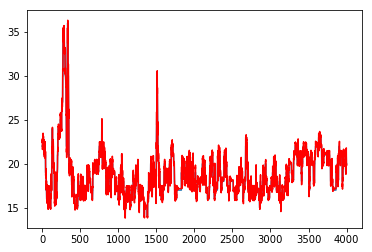

In [21]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
series = read_csv('https://raw.githubusercontent.com/leehaesung/AWS_BIG_DATA_SPECIALTY/master/data/pm25.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# split dataset
X = series.values
train, test = X[1:len(X)-4000], X[len(X)-4000:]

# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('{sensor:%f,prediction:%f}' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))

print('{TestRMSE:%.3f}' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# END